In [1]:
import sys
sys.path.append('../vysxd')
from vysxd_analysis import *
from vysxd_define import *
from transform import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as manimation
from scipy import *

In [2]:
p1x1_files = np.sort(os.listdir('data/MS/PHA/p1x1/electrons/')) # Create a sorted list of filenames you will be analyzing
p1x1_temp = vysxd_get_data(f'data/MS/PHA/p1x1/electrons/{p1x1_files[0]}') # pick out the first timestep for reasons
v_shock = 0.1

window_size = 64  # running window to calculate the second moment
T_ele = np.zeros(np.size(p1x1_temp.DATA, axis=0)-window_size)
x_range = p1x1_temp.X[int(window_size/2):len(p1x1_temp.X)-int(window_size/2)]
p1x1_temp.Y = (p1x1_temp.Y - v_shock)/(1 - p1x1_temp.Y*v_shock)

for i in range(len(T_ele)):
    p1x1_window = p1x1_temp.DATA[:,i:i+window_size]
    all_ele = np.sum(p1x1_window)
    distri_ele = np.sum(p1x1_window, axis=1)/all_ele
    p_ave = distri_ele.dot(p1x1_temp.Y)
    p_norm = p1x1_temp.Y - p_ave
    T = distri_ele.dot(p_norm**2)
    T_ele[i] = T

for file in p1x1_files[1:]:
    p1x1_ele = vysxd_get_data(f'data/MS/PHA/p1x1/electrons/{file}') # Pull the phase space data
    T_temp = np.zeros(np.size(p1x1_temp.DATA, axis=0)-window_size)
    p1x1_ele.Y = (p1x1_ele.Y - v_shock)/(1 - p1x1_ele.Y*v_shock)
    for i in range(len(T_temp)):
        p1x1_window = p1x1_ele.DATA[:,i:i+window_size]
        all_ele = np.sum(p1x1_window)
        distri_ele = np.sum(p1x1_window, axis=1)/all_ele
        p_ave = distri_ele.dot(p1x1_ele.Y)
        p_norm = p1x1_ele.Y - p_ave
        T = distri_ele.dot(p_norm**2)
        T_temp[i] = T
    T_ele = np.vstack((T_ele,T_temp))
    


In [3]:
## pull data

b1_path = 'data/MS/FLD/part_b1/'
b2_path = 'data/MS/FLD/part_b2/'
b3_path = 'data/MS/FLD/part_b3/'


b1= get_osiris_quantity_1d(b1_path)
b1_0 = vysxd_get_data(f'{b1_path}part_b1-000000.h5') ##can use this for easy labeling

b2 = get_osiris_quantity_1d(b2_path)
b2_0 = vysxd_get_data(f'{b2_path}part_b2-000000.h5')

b3 = get_osiris_quantity_1d(b3_path)
b3_0 = vysxd_get_data(f'{b3_path}part_b3-000000.h5')


e1_path = 'data/MS/FLD/part_e1/'
e2_path = 'data/MS/FLD/part_e2/'
e3_path = 'data/MS/FLD/part_e3/'

e1 = get_osiris_quantity_1d(e1_path)
e1_0 = vysxd_get_data(f'{e1_path}part_e1-000000.h5') ##can use this for easy labeling

e2 = get_osiris_quantity_1d(e2_path)
e2_0 = vysxd_get_data(f'{e2_path}part_e2-000000.h5')

e3 = get_osiris_quantity_1d(e3_path)
e3_0 = vysxd_get_data(f'{e3_path}part_e3-000000.h5')

e_density = get_osiris_quantity_1d('data/MS/DENSITY/electrons/charge/')
e_density_0 = vysxd_get_data('data/MS/DENSITY/electrons/charge/charge-electrons-000000.h5')

p_density = get_osiris_quantity_1d('data/MS/DENSITY/positrons/charge/')
p_density_0 = vysxd_get_data('data/MS/DENSITY/positrons/charge/charge-positrons-000000.h5')

e_ufl1 = get_osiris_quantity_1d('data/MS/UDIST/electrons/ufl1/')
e_ufl1_0 = vysxd_get_data('data/MS/UDIST/electrons/ufl1/ufl1-electrons-000000.h5')

# Useful to keep these as global variables
dt, dx, t, x = e1[1], e1[2], e1[3], e1[4]

In [4]:
window_size = 64

# window size : 64
$$ 
T = \int(v-v_{ave})^2 f_0 \, dv 
$$ is this correct?


(922, 448)


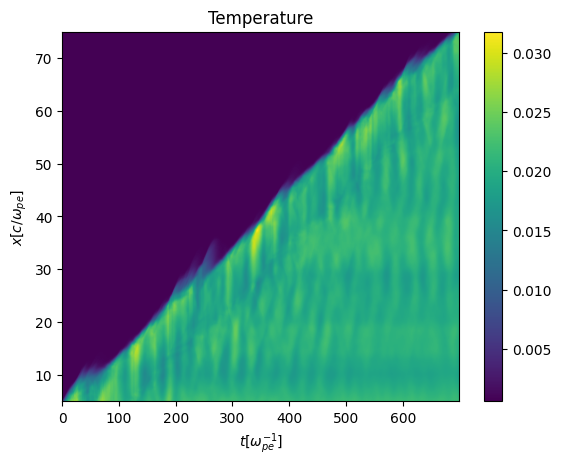

In [5]:
plt.imshow(T_ele.T,origin='lower',aspect='auto',extent=[e_density[3][0], e_density[3][-1],p1x1_temp.X[int(window_size/2)], p1x1_temp.X[len(p1x1_temp.X)-int(window_size/2)]])
plt.colorbar()
plt.xlabel(r'$t [\omega_{pe}^{-1}]$')
plt.ylabel(r'$x [c/\omega_{pe}]$')
plt.title('Temperature')

#xrange is the oringinal range cut the window
print(np.shape(T_ele))

In [6]:
xmin = 20; xmax = 40; tmin = 300;tmax =400; v=0.1

In [7]:
temperature_ = box_integrate([T_ele,dt, dx, np.linspace(0,700,len(T_ele[:,0])),np.linspace(0,80,len(T_ele[0,:]))],xmin = xmin, xmax = xmax, tmin = tmin,tmax =tmax, v=v)

illustrate_box([T_ele,dt, dx, np.linspace(0,700,len(T_ele[:,0])),np.linspace(0,80,len(T_ele[0,:]))],xmin = xmin, xmax = xmax, tmin = tmin,tmax=tmax, v=v)

/home/david/schaeffer/basic_shock_large/../vysxd/transform.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)


ValueError: One of the requested xi is out of bounds in dimension 1

In [7]:
print(np.shape(T_ele))
print(np.shape(t))
print(np.shape(x))

(922, 448)
(921,)
(1024,)


In [35]:
print(x)

[0.0000000e+00 7.8125000e-02 1.5625000e-01 ... 7.9765625e+01 7.9843750e+01
 7.9921875e+01]


In [ ]:
box_integrate